In [147]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv('mine.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [149]:
# Display the first few values of the table
print(df.head())

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [150]:
# Display the last few values of the table
print(df.tail())

     Duration  Pulse  Maxpulse  Calories
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4


In [151]:
# Get information about the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [152]:
# Cleaning the data

In [153]:
# Removes the rows with missing values
df.dropna(inplace=True)

In [154]:
# Fills the missing row with a 0
df.fillna(0, inplace=True)

<Axes: >

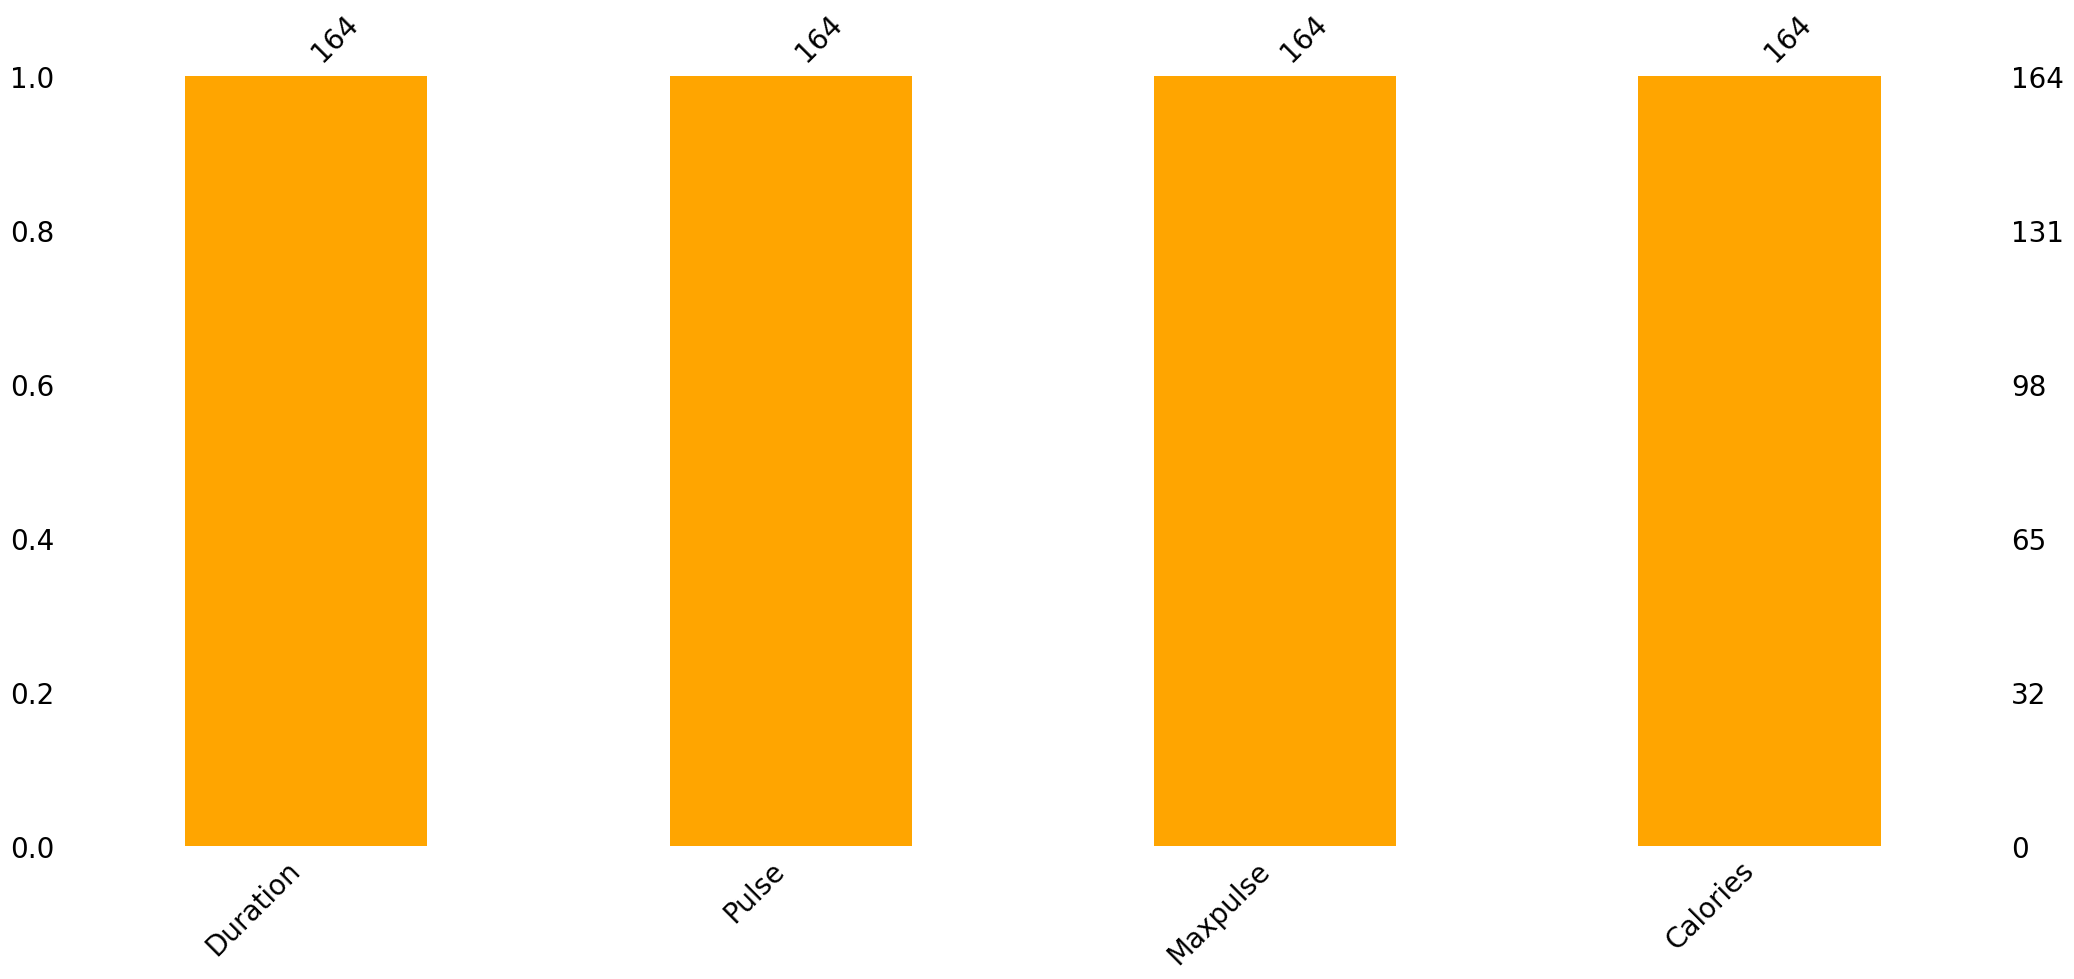

In [155]:
# Checking for null values in values
import missingno as msno
msno.bar(df, color="orange", fontsize=20)

In [156]:
# Check for missing values in each column
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Index([], dtype='object')


In [157]:
# Define the expected format for each column
format_mapping = {
    'Duration': 'int',
    'Pluse': 'int',
    'Maxpulse': 'int',
    'Calories': 'float'
}

# Iterate over the columns
for column in df.columns:
    if column in format_mapping:
        expected_format = format_mapping[column]
        wrong_format = df[column].astype(str) != expected_format
        
        if wrong_format.any():
            print(f"Rows with wrong format in '{column}' column:")
            wrong_format_rows = df[wrong_format]
            print(wrong_format_rows)
            
            # Substitute the wrong format values with the correct format
            df.loc[wrong_format, column] = expected_format

# Display the modified DataFrame
print("Modified DataFrame:")
print(df)

Rows with wrong format in 'Duration' column:
     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[164 rows x 4 columns]
Rows with wrong format in 'Maxpulse' column:
    Duration  Pulse  Maxpulse  Calories
0        int    110       130     409.1
1        int    117       145     479.0
2        int    103       135     340.0
3        int    109       175     282.4
4        int    117       148     406.0
..       ...    ...       ...       ...
164      int    105       140     290.8
165      int    110       145     300.0
166      int    115       145     

In [158]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
    Duration  Pulse Maxpulse Calories
4        int    117      int    float
6        int    110      int    float
8        int    109      int    float
10       int    103      int    float
13       int    104      int    float
..       ...    ...      ...      ...
162      int     95      int    float
163      int    100      int    float
164      int    105      int    float
165      int    110      int    float
166      int    115      int    float

[117 rows x 4 columns]


In [159]:
# Check for missing values in each row
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)

Rows with missing values:
Empty DataFrame
Columns: [Duration, Pulse, Maxpulse, Calories]
Index: []


In [160]:
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')     # Convert 'Score' column to numeric, coercing invalid values to NaN
df.dropna(inplace=True)     # Remove rows with invalid values
df.drop_duplicates(inplace=True)     # Remove duplicate rows

,Duration,Pulse,Maxpulse,Calories


In [161]:
# Perform correlation analysis
correlation = df['Calories'].corr(df['Duration'])
print("Correlation between Calories and Duration:", correlation)

Correlation between Calories and Duration: nan


In [162]:
df2 = pd.read_csv('work.csv')
df2

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


In [163]:
df2.head()

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94


In [164]:
df2.tail()

,Name,city,age,py-score
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      7 non-null      object
 1   city      7 non-null      object
 2   age       6 non-null      object
 3   py-score  6 non-null      object
dtypes: object(4)
memory usage: 356.0+ bytes


In [166]:
df2.dropna(inplace=True)

In [167]:
df2.fillna(0, inplace=True)

<Axes: >

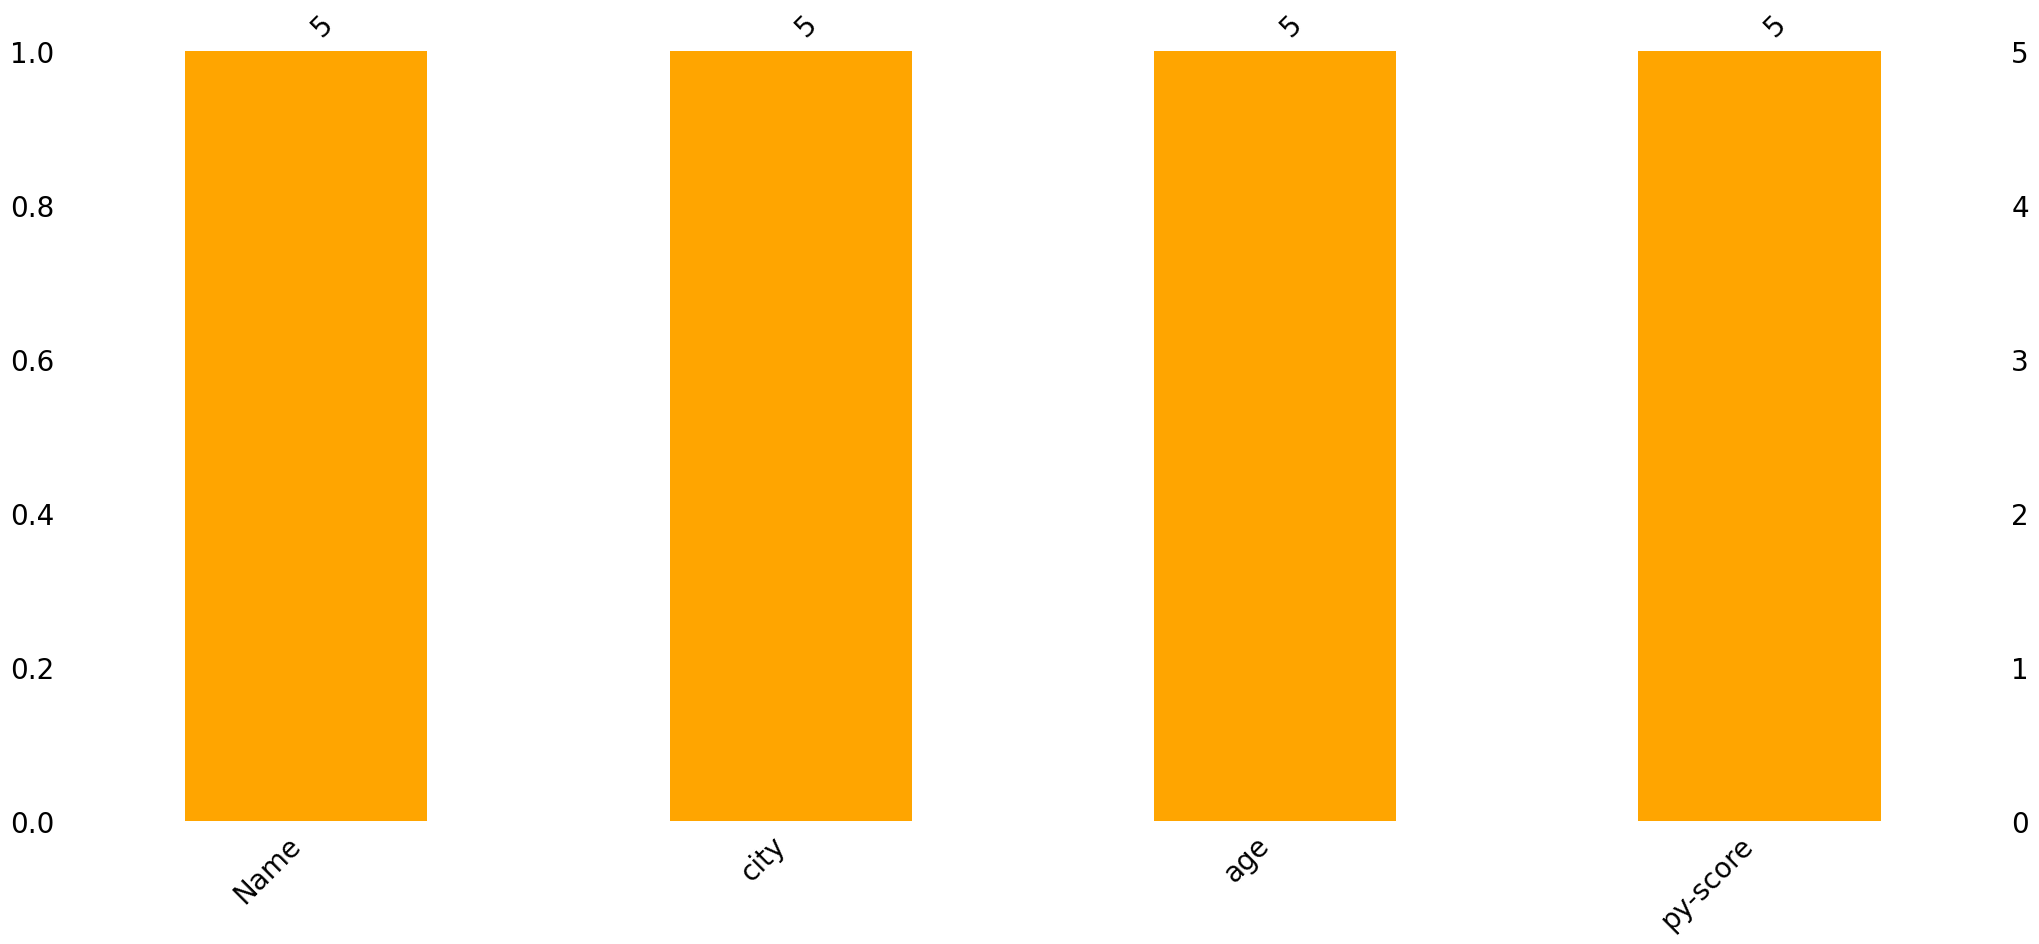

In [168]:
# Checking for null values in values
import missingno as msno
msno.bar(df2, color="orange", fontsize=20)

In [169]:
df2.duplicated().sum()

0

In [170]:
# Define the expected format for each column
format_mapping = {
    'Name': 'str',
    'City': 'str',
    'age': 'int',
    'py-score': 'int'
}

# Iterate over the columns
for column in df2.columns:
    if column in format_mapping:
        expected_format = format_mapping[column]
        wrong_format = df2[column].astype(str) != expected_format
        
        if wrong_format.any():
            print(f"Rows with wrong format in '{column}' column:")
            wrong_format_rows = df2[wrong_format]
            print(wrong_format_rows)
            
            # Substitute the wrong format values with the correct format
            df2.loc[wrong_format, column] = expected_format
# Display the modified DataFrame
print("Modified DataFrame:")
print(df2)

Rows with wrong format in 'Name' column:
     Name     city age py-score
0    Emma  Kampala  23       90
1  Wilber    Mbale  26       75
2   Robin     Gulu  25     mine
4    Yeko   Tororo  20       94
6   Jesca  Mbarara  21       84
Rows with wrong format in 'age' column:
  Name     city age py-score
0  str  Kampala  23       90
1  str    Mbale  26       75
2  str     Gulu  25     mine
4  str   Tororo  20       94
6  str  Mbarara  21       84
Rows with wrong format in 'py-score' column:
  Name     city  age py-score
0  str  Kampala  int       90
1  str    Mbale  int       75
2  str     Gulu  int     mine
4  str   Tororo  int       94
6  str  Mbarara  int       84
Modified DataFrame:
  Name     city  age py-score
0  str  Kampala  int      int
1  str    Mbale  int      int
2  str     Gulu  int      int
4  str   Tororo  int      int
6  str  Mbarara  int      int


In [171]:
df2['py-score'] = pd.to_numeric(df2['py-score'], errors='coerce')     # Convert 'Score' column to numeric, coercing invalid values to NaN
df2.dropna(inplace=True)     # Remove rows with invalid values
df2.drop_duplicates(inplace=True)     # Remove duplicate rows

,Name,city,age,py-score


In [172]:
# Perform correlation analysis
correlation = df2['py-score'].corr(df2['Name'])
print("Correlation between Name and py-score:", correlation)

Correlation between Name and py-score: nan
